Epoch [1/5], Step [100/938], Loss: 0.4048
Epoch [1/5], Step [200/938], Loss: 0.3009
Epoch [1/5], Step [300/938], Loss: 0.3262
Epoch [1/5], Step [400/938], Loss: 0.2667
Epoch [1/5], Step [500/938], Loss: 0.2711
Epoch [1/5], Step [600/938], Loss: 0.1827
Epoch [1/5], Step [700/938], Loss: 0.2961
Epoch [1/5], Step [800/938], Loss: 0.1398
Epoch [1/5], Step [900/938], Loss: 0.2499
Epoch [2/5], Step [100/938], Loss: 0.2053
Epoch [2/5], Step [200/938], Loss: 0.2323
Epoch [2/5], Step [300/938], Loss: 0.1522
Epoch [2/5], Step [400/938], Loss: 0.1220
Epoch [2/5], Step [500/938], Loss: 0.1765
Epoch [2/5], Step [600/938], Loss: 0.2896
Epoch [2/5], Step [700/938], Loss: 0.1378
Epoch [2/5], Step [800/938], Loss: 0.1074
Epoch [2/5], Step [900/938], Loss: 0.3014
Epoch [3/5], Step [100/938], Loss: 0.2824
Epoch [3/5], Step [200/938], Loss: 0.0965
Epoch [3/5], Step [300/938], Loss: 0.2941
Epoch [3/5], Step [400/938], Loss: 0.0885
Epoch [3/5], Step [500/938], Loss: 0.1833
Epoch [3/5], Step [600/938], Loss:

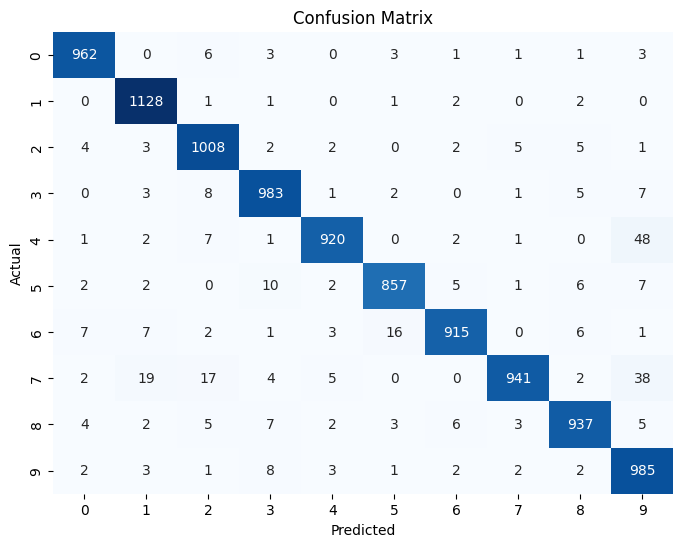

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.94      0.96       982
           5       0.97      0.96      0.97       892
           6       0.98      0.96      0.97       958
           7       0.99      0.92      0.95      1028
           8       0.97      0.96      0.97       974
           9       0.90      0.98      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Download and load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Testing the model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))